# 데이터 수집

In [1]:
import seaborn as sns
import pandas as pd

In [2]:
titanic = sns.load_dataset('titanic')

In [4]:
#titanic.to_csv('C:/Users/nxzpa001/7장_data/titanic.csv', index=False)

# 데이터 준비

In [5]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

In [9]:
titanic['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [10]:
titanic['embarked'] = titanic['embarked'].fillna('S')

In [11]:
titanic['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [12]:
titanic['embark_town'] = titanic['embark_town'].fillna('Southampton')

In [13]:
titanic['deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [14]:
titanic['deck'] = titanic['deck'].fillna('C')

In [15]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

# 데이터 탐색

In [16]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


# 차트를 그려 데이터를 시각적으로 탐색하기

In [17]:
import matplotlib.pyplot as plt

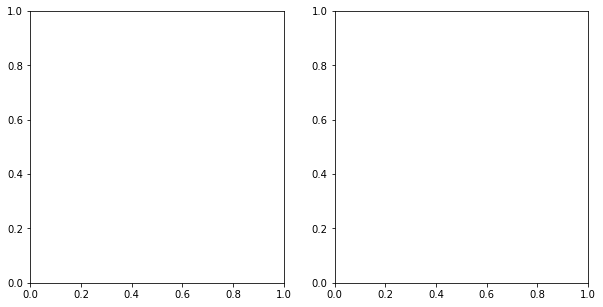

In [20]:
f, ax = plt.subplots(1, 2, figsize=(10,5))

In [23]:
titanic['survived'][titanic['sex'] == 'male'].value_counts().plot.pie(explode = [0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)

<AxesSubplot:ylabel='survived'>

In [24]:
titanic['survived'][titanic['sex'] == 'female'].value_counts().plot.pie(explode = [0,0.1], autopct='%1.1f%%', ax=ax[1], shadow=True)

<AxesSubplot:ylabel='survived'>

In [25]:
ax[0].set_title('Survived (Male)')

Text(0.5, 1.0, 'Survived (Male)')

In [26]:
ax[1].set_title('Survived (Female)')

Text(0.5, 1.0, 'Survived (Female)')

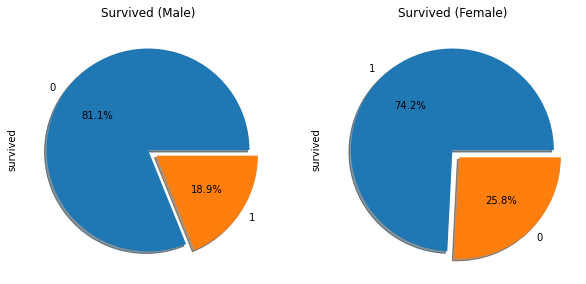

In [28]:
#plt.show()
f

# 등급별 생존자 수를 차트로 나타내기

C:\Users\nxzpa001\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Pclass vs Survived')

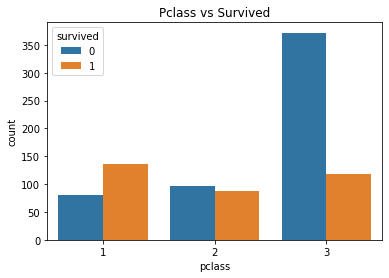

In [33]:
a = sns.countplot('pclass', hue='survived', data=titanic)
plt.title('Pclass vs Survived')

# 데이터 모델링 (상관 분석을 위한 상관 계수 저장)

In [34]:
titanic_corr = titanic.corr(method='pearson')
titanic_corr

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.247704,0.171647
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.247704,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [35]:
titanic_corr.to_csv('titanic_corr.csv', index=False)

# 특정 변수 사이의 상관 계수 구하기

In [46]:
titanic['survived'].corr(titanic['adult_male'])

-0.5570800422053255

In [47]:
titanic['survived'].corr(titanic['fare'])

0.2573065223849623

# 결과시각화 (산점도로 상관 분석 시각화하기)

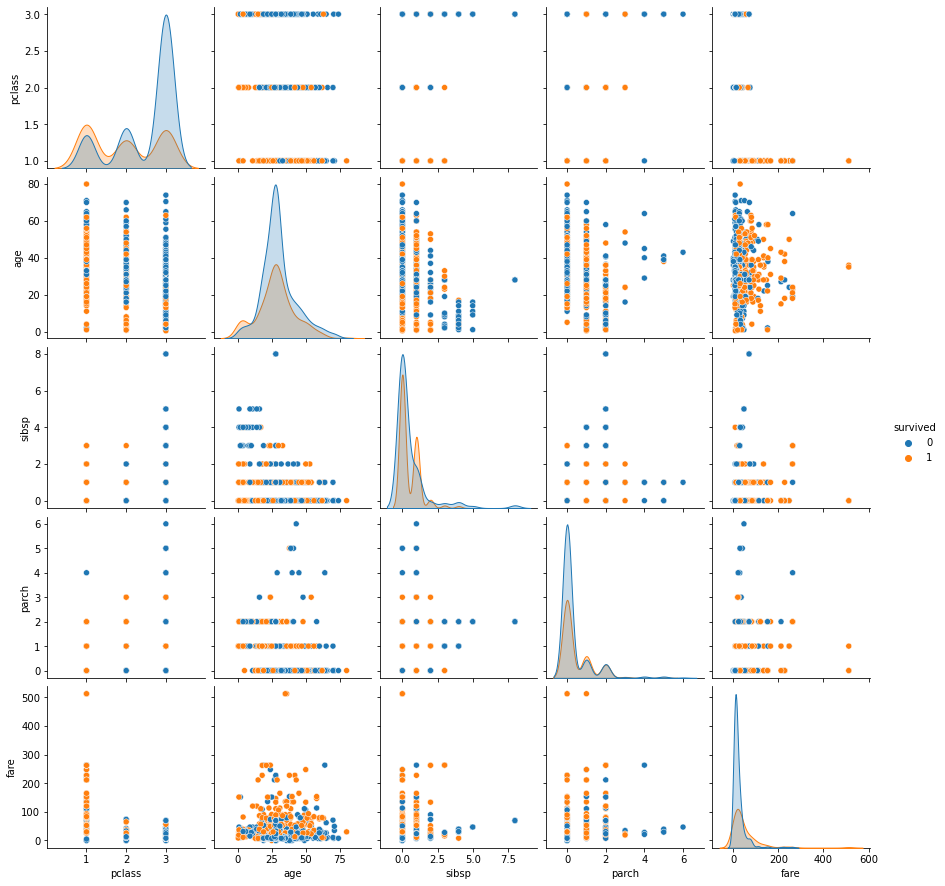

In [56]:
titanic_num = titanic.select_dtypes(include=['number'])
titanic_num
fig = sns.pairplot(titanic_num, hue='survived')

# 두 변수의 상관관계 시각화하기

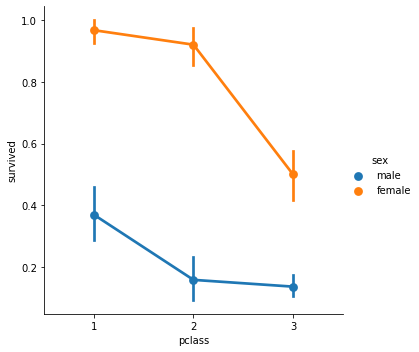

In [57]:
sns.catplot(x = 'pclass', y='survived', hue='sex', data=titanic, kind='point')

# 변수 사이의 상관 계수를 히트맵으로 시각화하기

In [58]:
def category_age(x):
    if x < 10:
        return 0
    elif x <20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

In [59]:
titanic['age2'] = titanic['age'].apply(category_age)

In [61]:
titanic['sex'] = titanic['sex'].map({'male':1, 'female':0})

In [62]:
titanic['family']=titanic['sibsp']+titanic['parch']+1

In [63]:
titanic.to_csv('titanic3.csv', index=False)

In [68]:
titanic.columns
heatmap_data = titanic[['survived', 'sex', 'fare', 'age2', 'family']]

<AxesSubplot:>

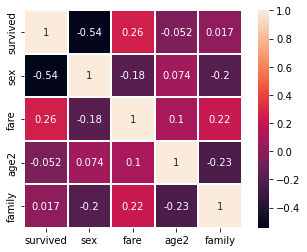

In [74]:
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0, square = True, linecolor='white', annot=True, annot_kws={'size':10})